In [87]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [56]:
os.listdir()

['.ipynb_checkpoints',
 'logins.json',
 'ultimate_data_challenge.json',
 'ultimate_data_science_challenge.pdf',
 'Ultimate_tech_Challenge.ipynb']

In [57]:
# Load logins data
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [58]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [59]:
logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


## Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [60]:
# Move our login times to the index
indexed_logins = logins.set_index(['login_time'])
# Counting each 15-minute interval
indexed_logins['count'] = 1
indexed_logins_15T = indexed_logins.resample('15T').count()
indexed_logins_15T = indexed_logins_15T.reset_index()
indexed_logins_15T.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


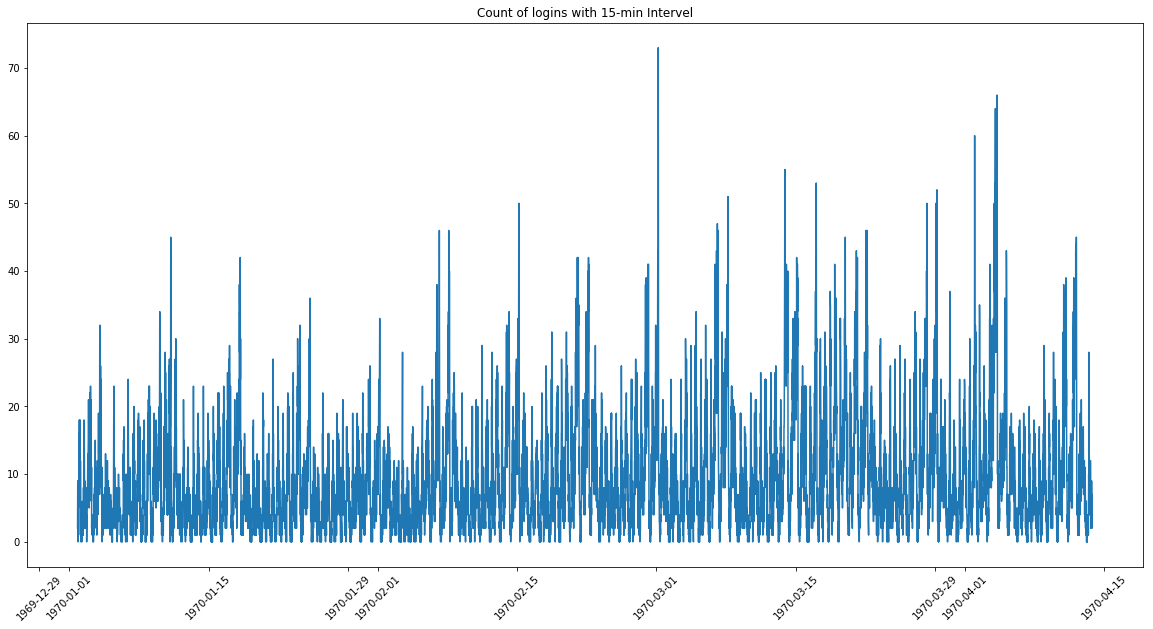

In [61]:
# Display plot of counts for all 15-minute intervals
plt.figure(figsize=(20,10))
x = indexed_logins_15T['login_time']
y = indexed_logins_15T['count']
plt.plot(x, y)
plt.title('Count of logins with 15-min Intervel')
plt.xticks(rotation=45);

We observe that there is cyclical pattern to indicate popular and unpopular login times and days. We now look to see if there are underlying patterns of demand on a monthly basis.

In [62]:
# Creating tables for each month
jan = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-01')
                           & (indexed_logins_15T.login_time < '1970-02')]
feb = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-02')
                           & (indexed_logins_15T.login_time < '1970-03')]
mar = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-03')
                           & (indexed_logins_15T.login_time < '1970-04')]
apr = indexed_logins_15T[(indexed_logins_15T.login_time > '1970-04')
                           & (indexed_logins_15T.login_time < '1970-05')]

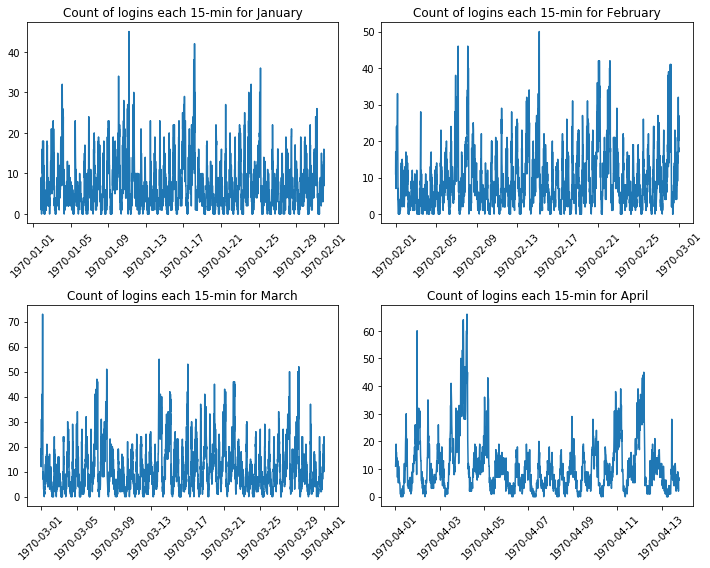

In [63]:
# Plotting monthly logins for all 4 months
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
x = jan['login_time']
y = jan['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for January')
plt.xticks(rotation=45);

plt.subplot(2,2,2)
x = feb['login_time']
y = feb['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for February')
plt.xticks(rotation=45);

plt.subplot(2,2,3)
x = mar['login_time']
y = mar['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for March')
plt.xticks(rotation=45);

plt.subplot(2,2,4)
x = apr['login_time']
y = apr['count']
plt.plot(x, y)
plt.title('Count of logins each 15-min for April')
plt.xticks(rotation=45);
plt.tight_layout()
plt.show()

We see above that the up and down patterns are seen again but they are less regular compare to before. We will next dive deeper into the patterns of each week.

In [64]:
# Login counts based on days of the week, 0 = Monday, 6 = Sunday
indexed_logins_15T['weekday'] = indexed_logins_15T[
    'login_time'].dt.dayofweek
wkday = indexed_logins_15T.sort_values(by='count', ascending=False)
wkday_counts = wkday[['count', 'weekday']]
wkday_count = wkday_counts.groupby('weekday').sum().reset_index()
wkday_count

,weekday,count
0,0,8823
1,1,9268
2,2,10339
3,3,11960
4,4,15208
5,5,19377
6,6,18167


We see in the above table that there is a definite increased in demand as the week progressses starting on Monday and peaking on Saturdays and Sundays.

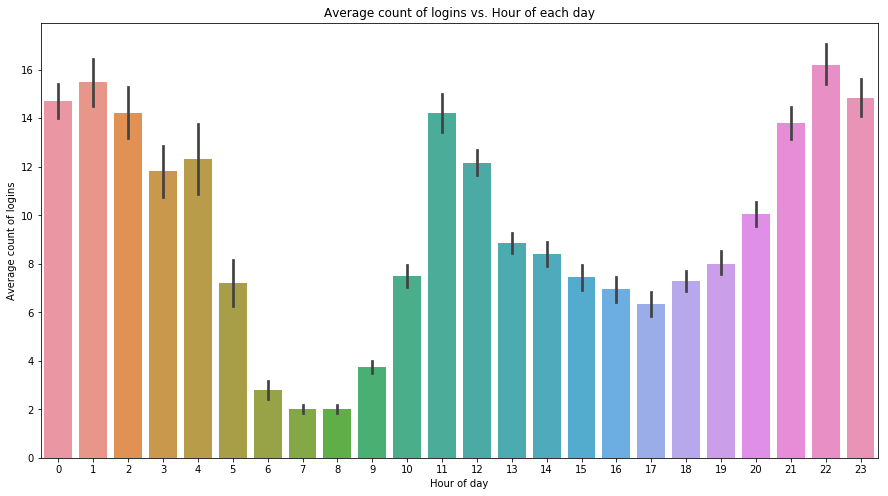

In [88]:
# Next, we will dive deeper by plotting patterns of logins in hours of the day

# Splitting into hours
indexed_logins_15T['hour'] = indexed_logins_15T[
    'login_time'].dt.hour
hours = indexed_logins_15T
hour = hours[['count', 'hour']]
hour = hour.groupby('hour').sum().reset_index()

# Visualizing count of logins per hour of the day
plt.figure(figsize=(15,8))
sns.barplot(x='hour', y='count', data=hours)
plt.ylabel('Average count of logins')
plt.xlabel('Hour of day')
plt.title('Average count of logins vs. Hour of each day')
plt.show()

We observe that the peak popular times are during lunch times (11am-12pm) and nightlife entertainment time (11pm-4am).

After our exploratory data analysis above, we can conclude that demand for Ultimate Technologies Inc. increases throughout the week starting on monday and peaks during weekends with the highest demand on Saturdays. Addtionally, without regards to days of the week, we observed that the peak popular times are during lunch times (11am-12pm) and nightlife entertainment time (11pm-4am).

## Part 2 Experiment and Metrics design
Our next challenges are to solve the following challenges of Gotham and Metropolis:

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
a. how you will implement the experiment 
b. what statistical test(s) you will conduct to verify the significance of the observation 
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 
To find the key measure success of the proposed experiment, we should look into whether the costs of implementation including the toll cost reimbursements will be lower compare to the additional income provided after implementation, thus we can analyze metrics that will include login times before and after implementation, the change in income this change in logins will bring (should be higher), and then subtract this with the cost of reimbursements to drivers to have our key metric of profit after toll costs reimbursement.

To measure the significance of our experiment, we can devised a test group and control group and measure the change in profits and other relevant measures using a 1-sample z statistical test with a sample size of at least 30 driver partners. It's important that we continually measure all effective changes as without any new changes, people can respond to incentives. For instance, logins might increase leading to higher profit, but toll prices might increase due to higher demands on the bridge which might actually lead to lower profit after reimbursements.

## Part 3 Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Data description
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form ‘YYYY MM DD’
last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
avg_dist: the average distance in miles per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday

In [66]:
# Load provided riders' json data into a pandas dataframe
with open('ultimate_data_challenge.json') as f:
    file = json.load(f)
df = pd.DataFrame(file)
df.head().T

,0,1,2,3,4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15
phone,iPhone,Android,iPhone,iPhone,Android
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27
surge_pct,15.4,0,0,20,11.8
trips_in_first_30_days,4,0,3,9,14


In [67]:
# Initial EDA of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [68]:
# Summary stats for each variable
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [69]:
# We notice above that there are less ratings by drivers and rides leading to missing values
# Fill in missing values by using the averages of the relevant columns 

# Impute in missing values
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

# Convert last trip and sign up columns to datetime objects
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


             city  trips_in_first_30_days
0         Astapor                   32219
1  King's Landing                   24957
2      Winterfell                   56734


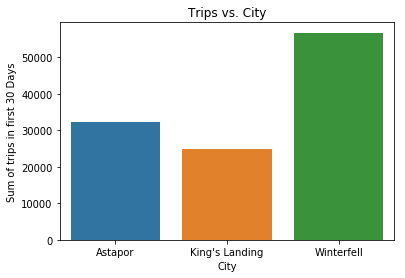

In [70]:
# We will visualize our data to get a better idea of how to increase retention rates 

# We start with examining the feature 'trips within the first 30 days'

# Create dataframe for city and trips
trips_city = (df[['trips_in_first_30_days', 'city']].groupby('city').sum().reset_index())

# We see below that Winterfell has the most trips and likely the highest population
print(trips_city)

# Trips vs City plot
sns.barplot(x='city', y='trips_in_first_30_days', data=trips_city)
plt.ylabel('Sum of trips in first 30 Days')
plt.xlabel('City')
plt.title('Trips vs. City')
plt.show()

     phone  trips_in_first_30_days
0  Android                   29067
1   iPhone                   84843


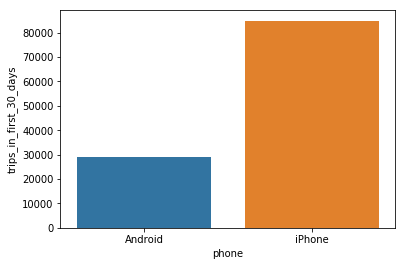

In [71]:
# Then we look at the difference between type of phones 

# Create dataframe for phone and trips
trips_phone= df[['trips_in_first_30_days', 'phone']].groupby('phone').sum().reset_index()
print(trips_phone)

# We see that there are more iPhone trips in first 30 days
sns.barplot(x='phone', y='trips_in_first_30_days', data=trips_phone)
plt.show()

Now, we construct a 6-month retention parameter for our dataset. If the user has taken a trip in 6-months before our last recorded data point, they are considered a retained user.

In [72]:
active_users = []
for i in range(len(df)):
    st = pd.Timestamp(df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(df['last_trip_date'][i]) <= et:
        active_users.append(1) # now that the active condition has been met, set active user to 1
    else:
        active_users.append(0)

In [73]:
df['active_users'] = active_users

In [74]:
df.head().T

,0,1,2,3,4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
surge_pct,15.4,0,0,20,11.8
trips_in_first_30_days,4,0,3,9,14


In [75]:
# Active users
df['active_users'].sum()/len(df)

0.24396

#### EDA Insights

most users are in Winterfell

24.39% of users were active users

In [76]:
df.head().T

,0,1,2,3,4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
surge_pct,15.4,0,0,20,11.8
trips_in_first_30_days,4,0,3,9,14


In [77]:
# Dropping date-time features for predictive modeling
df.drop('last_trip_date', axis=1, inplace=True)
df.drop('signup_date', axis=1, inplace=True)

# Attain our'retained' target values 
y = df['active_users'].values

# Attain features
df = df.drop('active_users', axis=1)
df.head().T

,0,1,2,3,4
avg_dist,3.67,8.26,0.77,2.36,3.13
avg_rating_by_driver,5,5,5,4.9,4.9
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
trips_in_first_30_days,4,0,3,9,14
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


In [80]:
# One-hot-encode for categorical features via .get_dummies pandas method
df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'], drop_first=True)
df_encoded.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,15.4,4,46.2,1,0,1,1
1,8.26,5.0,5.0,1.00,0.0,0,50.0,0,0,0,0
2,0.77,5.0,4.3,1.00,0.0,3,100.0,0,0,1,0
3,2.36,4.9,4.6,1.14,20.0,9,80.0,1,0,1,1
4,3.13,4.9,4.4,1.19,11.8,14,82.4,0,1,0,0


In [81]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                    50000 non-null float64
avg_rating_by_driver        50000 non-null float64
avg_rating_of_driver        50000 non-null float64
avg_surge                   50000 non-null float64
surge_pct                   50000 non-null float64
trips_in_first_30_days      50000 non-null int64
weekday_pct                 50000 non-null float64
city_King's Landing         50000 non-null uint8
city_Winterfell             50000 non-null uint8
phone_iPhone                50000 non-null uint8
ultimate_black_user_True    50000 non-null uint8
dtypes: float64(6), int64(1), uint8(4)
memory usage: 2.9 MB


In [83]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_encoded.values, y, test_size = 0.2, random_state = 0)

In [84]:
# First scale our features to speed up training 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7252  332]
 [1956  460]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      7584
           1       0.58      0.19      0.29      2416

   micro avg       0.77      0.77      0.77     10000
   macro avg       0.68      0.57      0.58     10000
weighted avg       0.74      0.77      0.72     10000



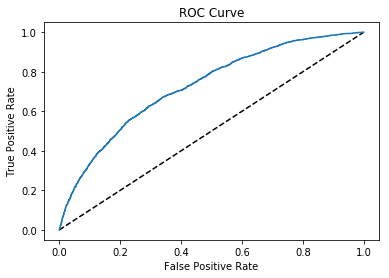

In [90]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, df_encoded.values, y, cv = 5,scoring = 'roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.725931651594853
AUC scores computed using 5-fold cross-validation: [0.73814603 0.72710734 0.72400013 0.73071378 0.73883013]


In [95]:
#Gridsearch to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV
def cv_optimize(model, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(model, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    print("BEST SCORE", gs.best_score_)
    best = gs.best_estimator_
    return best

In [96]:
# Setup the hyperparameter grid
parameter_log = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'sag', 'saga']}

cv_optimize(logreg, parameter_log, X_train, y_train)

BEST PARAMS {'C': 0.1, 'solver': 'newton-cg'}
BEST SCORE 0.7681


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [104]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Text(0, 0.5, 'Feature Importance Score')

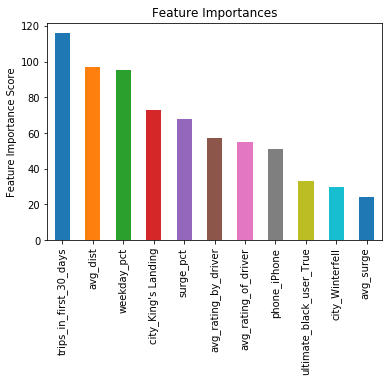

In [105]:
feat_imp = pd.Series(model.get_booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [106]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.73%
